# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Logan Caldwell - OpenWeatherMap API latitude/longitude data analysis
# 2019

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# city_pd = pd.read_csv(output_data_file)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Createing a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identifing nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# API request logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Grouping cities in sets of 50 for logging/tracking
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Endpoint URL for each city
    city_url = url + "&q=" + city
    
    # Logging the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Increment record count
    record_count += 1

    # API request for each of the cities
    try:
        # Parse JSON and get data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping.....")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushtobe
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping.....
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | bengkulu
City not found. Skipping.....
Processing Record 7 of Set 1 | mama
Processing Record 8 of Set 1 | gat
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | laiagam
City not found. Skipping.....
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping.....
Processing Record 15 of Set 1 | moramanga
Processing Record 16 of Set 1 | kahului
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of S

Processing Record 32 of Set 4 | olavarria
Processing Record 33 of Set 4 | kavieng
Processing Record 34 of Set 4 | pombos
Processing Record 35 of Set 4 | hasaki
Processing Record 36 of Set 4 | pangnirtung
Processing Record 37 of Set 4 | ust-tarka
Processing Record 38 of Set 4 | laguna
Processing Record 39 of Set 4 | mutis
Processing Record 40 of Set 4 | pudozh
Processing Record 41 of Set 4 | nanakuli
Processing Record 42 of Set 4 | grand gaube
Processing Record 43 of Set 4 | cap malheureux
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | palaikastron
Processing Record 46 of Set 4 | saint george
Processing Record 47 of Set 4 | smirnykh
Processing Record 48 of Set 4 | harbour breton
Processing Record 49 of Set 4 | isangel
Processing Record 0 of Set 5 | port hedland
Processing Record 1 of Set 5 | saravan
Processing Record 2 of Set 5 | ranong
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | xingyi
Processing Record 5 of Set 5 | sangar
Process

Processing Record 21 of Set 8 | jega
Processing Record 22 of Set 8 | boffa
Processing Record 23 of Set 8 | ko samui
Processing Record 24 of Set 8 | kelo
City not found. Skipping.....
Processing Record 25 of Set 8 | nauta
Processing Record 26 of Set 8 | sinop
Processing Record 27 of Set 8 | castro
Processing Record 28 of Set 8 | edd
Processing Record 29 of Set 8 | durres
Processing Record 30 of Set 8 | tuktoyaktuk
Processing Record 31 of Set 8 | candolim
Processing Record 32 of Set 8 | carmen
Processing Record 33 of Set 8 | stromness
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | dunedin
Processing Record 36 of Set 8 | lolua
City not found. Skipping.....
Processing Record 37 of Set 8 | beipiao
Processing Record 38 of Set 8 | thunder bay
Processing Record 39 of Set 8 | sarankhola
Processing Record 40 of Set 8 | dillon
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | santa cruz
Processing Record 44 of

Processing Record 4 of Set 12 | messina
Processing Record 5 of Set 12 | chumikan
Processing Record 6 of Set 12 | vila
Processing Record 7 of Set 12 | green river
Processing Record 8 of Set 12 | eregli
Processing Record 9 of Set 12 | vila velha
Processing Record 10 of Set 12 | johnson city
Processing Record 11 of Set 12 | nerchinskiy zavod
Processing Record 12 of Set 12 | lincoln
Processing Record 13 of Set 12 | vagay
Processing Record 14 of Set 12 | jinchang
Processing Record 15 of Set 12 | dunayivtsi
City not found. Skipping.....
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | preobrazheniye
Processing Record 18 of Set 12 | nicolas bravo
Processing Record 19 of Set 12 | tsumeb
Processing Record 20 of Set 12 | kununurra
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | phrai bung
City not found. Skipping.....
Processing Record 23 of Set 12 | oum hadjer
Processing Record 24 of Set 12 | sao miguel do araguaia
Processing Record 25 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Converting array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

In [6]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,8,AU,1554391163,56,-23.58,149.07,72.52,13.02
1,ushtobe,0,KZ,1554391164,88,45.25,77.98,47.86,3.40
2,upernavik,48,GL,1554391083,100,72.79,-56.15,17.89,14.92
3,ilulissat,75,GL,1554389400,58,69.22,-51.10,28.40,18.34
4,mama,75,MX,1554391001,58,20.48,-89.36,86.00,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

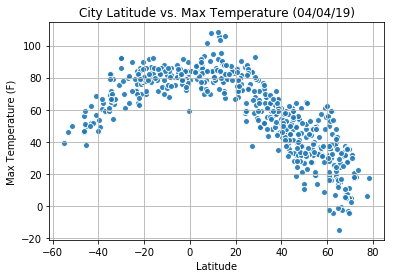

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.9, label="Cities",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

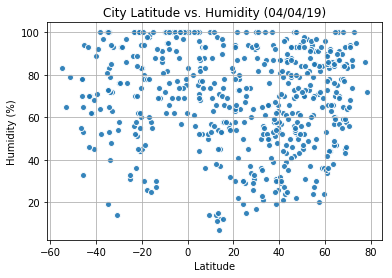

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.9, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

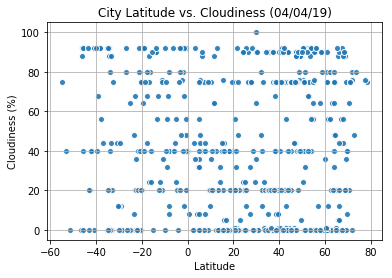

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.9, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

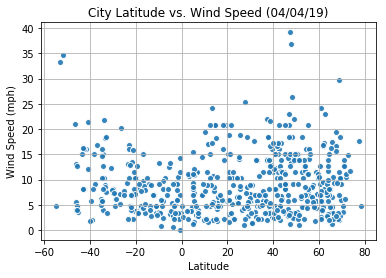

In [20]:
# Scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.9, label="Cities")

# Other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()